# Underpass <> Insights stats comparison

### How this notebook works?

This Jupyter notebook reads a report file generated by a couple of Underpass test tools, as described [here](https://github.com/hotosm/underpass/blob/master/doc/insights-stats-validation.png).

After processing the report, it will show the percentage of stats for buildings, highways and places that are different between Underpass and Insights. Buildings are our high priority right now. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [43]:
df = pd.read_json("./test-result.json.gz", orient="index").set_index("changeset").sort_index()

In [44]:
def get_report(tag):
    result = []
    count = 0
    for index, row in df.iterrows():
        if (row['underpass'] and row['insights']):
            count+=1
            if(row['underpass']['added_' + tag] != row['insights']['added_' + tag] or 
              row['underpass']['modified_' + tag] != row['insights']['modified_' + tag]):
                result.append(row)
    return result, count

In [45]:
results = {}
found_in_insights = 0
for tag in ["buildings", "places", "amenity"]:
    r, found_in_insights = get_report(tag)
    results[tag] = len(r)

In [46]:
report = {}
for key in results:
    report[key] = round(results[key] * 100 / len(df), 2)

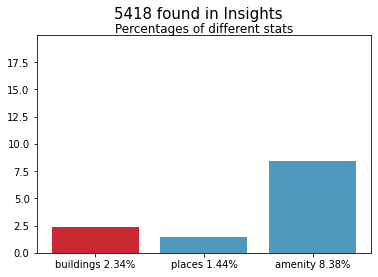

In [47]:
names = list(x + " " + str(report[x]) + "%"  for x in report.keys())
values = list(report.values())
plt.bar(range(len(report)),values,tick_label=names, color=['#CB2931', '#5098BD', '#5098BD'])
plt.suptitle(str(found_in_insights) + " found in Insights", fontsize=15)
plt.title("Percentages of different stats", pad=0)
plt.hlines(range(1,20),0,0)
plt.show()